In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
churn_df = pd.read_csv("Immunotherapy.csv")
churn_df.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


In [5]:
churn_df = churn_df[['sex', 'age', 'Time', 'Number_of_Warts', 'Result_of_Treatment']]
churn_df['Result_of_Treatment'] = churn_df['Result_of_Treatment'].astype('int')
churn_df.head()

,sex,age,Time,Number_of_Warts,Result_of_Treatment
0,1,22,2.25,14,1
1,1,15,3.00,2,1
2,1,16,10.50,2,1
3,1,27,4.50,9,1
4,1,20,8.00,6,1


In [8]:
X = np.asarray(churn_df[['sex', 'age', 'Time', 'Number_of_Warts']])
X[0:90]

array([[ 1.  , 22.  ,  2.25, 14.  ],
       [ 1.  , 15.  ,  3.  ,  2.  ],
       [ 1.  , 16.  , 10.5 ,  2.  ],
       [ 1.  , 27.  ,  4.5 ,  9.  ],
       [ 1.  , 20.  ,  8.  ,  6.  ],
       [ 1.  , 15.  ,  5.  ,  3.  ],
       [ 1.  , 35.  ,  9.75,  2.  ],
       [ 2.  , 28.  ,  7.5 ,  4.  ],
       [ 2.  , 19.  ,  6.  ,  2.  ],
       [ 2.  , 32.  , 12.  ,  6.  ],
       [ 2.  , 33.  ,  6.25,  2.  ],
       [ 2.  , 17.  ,  5.75, 12.  ],
       [ 2.  , 15.  ,  1.75,  1.  ],
       [ 2.  , 15.  ,  5.5 , 12.  ],
       [ 2.  , 16.  , 10.  ,  7.  ],
       [ 2.  , 33.  ,  9.25,  2.  ],
       [ 2.  , 26.  ,  7.75,  6.  ],
       [ 2.  , 23.  ,  7.5 , 10.  ],
       [ 2.  , 15.  ,  6.5 , 19.  ],
       [ 2.  , 26.  ,  6.75,  2.  ],
       [ 1.  , 22.  ,  1.25,  3.  ],
       [ 2.  , 19.  ,  2.25,  2.  ],
       [ 2.  , 26.  , 10.5 ,  6.  ],
       [ 1.  , 25.  ,  5.75,  2.  ],
       [ 2.  , 17.  , 11.25,  4.  ],
       [ 1.  , 27.  ,  5.  ,  2.  ],
       [ 2.  , 24.  ,  4.75, 10.  ],
 

In [9]:
y = np.asarray(churn_df['Result_of_Treatment'])
y [0:90]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

In [15]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:90]

array([[-1.09321633, -0.74334211, -1.61658786,  1.87538435],
       [-1.09321633, -1.31865603, -1.37315299, -0.98941777],
       [-1.09321633, -1.23646832,  1.06119571, -0.98941777],
       [-1.09321633, -0.3324036 , -0.88628325,  0.6817168 ],
       [-1.09321633, -0.90771751,  0.24974614, -0.03448373],
       [-1.09321633, -1.31865603, -0.72399333, -0.75068426],
       [-1.09321633,  0.32509802,  0.81776084, -0.98941777],
       [ 0.91473203, -0.25021589,  0.08745623, -0.51195075],
       [ 0.91473203, -0.98990522, -0.39941351, -0.98941777],
       [ 0.91473203,  0.07853492,  1.54806545, -0.03448373],
       [ 0.91473203,  0.16072262, -0.31826855, -0.98941777],
       [ 0.91473203, -1.15428062, -0.48055847,  1.39791733],
       [ 0.91473203, -1.31865603, -1.77887777, -1.22815128],
       [ 0.91473203, -1.31865603, -0.56170342,  1.39791733],
       [ 0.91473203, -1.23646832,  0.8989058 ,  0.20424978],
       [ 0.91473203,  0.16072262,  0.65547093, -0.98941777],
       [ 0.91473203, -0.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (72, 4) (72,)
Test set: (18, 4) (18,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [19]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.464637  , 0.535363  ],
       [0.44177026, 0.55822974],
       [0.48604571, 0.51395429],
       [0.45129871, 0.54870129],
       [0.4683274 , 0.5316726 ],
       [0.40712453, 0.59287547],
       [0.44973925, 0.55026075],
       [0.48361824, 0.51638176],
       [0.40301917, 0.59698083],
       [0.47254352, 0.52745648],
       [0.47318743, 0.52681257],
       [0.43506318, 0.56493682],
       [0.47890172, 0.52109828],
       [0.45880784, 0.54119216],
       [0.5035649 , 0.4964351 ],
       [0.48558539, 0.51441461],
       [0.47117608, 0.52882392],
       [0.45881556, 0.54118444]])

In [20]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

E:\KULIAH\FGA\digitalent2\EDA\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8888888888888888

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[15  0]
 [ 2  1]]


Confusion matrix, without normalization
[[15  0]
 [ 2  1]]


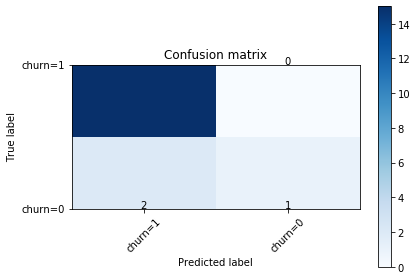

In [22]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [23]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.88      1.00      0.94        15

    accuracy                           0.89        18
   macro avg       0.94      0.67      0.72        18
weighted avg       0.90      0.89      0.86        18



In [24]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6337625884790437